In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Datasets/Light Duty Vehicles.csv')

In [6]:
df.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [8]:
df.shape

(3008, 29)

Este dataset contiene 3008 filas de datos y 29 columnas, asimismo el dataset contiene los datos limpios de los coches de todos los combustibles sin embargo no están del todo limpios.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

Se puede deducir que existen datos específicos por ser de un tipo de vehiculo con su respectivo combustible

In [10]:
df.describe()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count,Electric-Only Range,PHEV Total Range
count,3008.00000,3008.000000,2973.000000,3008.000000,3008.000000,3008.000000,1595.000000,1505.000000,467.000000,2044.000000,2046.000000,763.000000,2443.000000,374.000000,43.000000
mean,9424.59242,31.003989,4.907164,255.855718,24.988697,2014.493019,38.439298,37.392651,72.126338,22.781605,27.443206,27.832241,6.085960,148.251337,450.465116
std,4667.98027,18.311570,3.263154,64.474477,6.021677,6.722191,47.778798,42.724296,36.776309,10.794132,10.123663,10.265666,1.762977,128.708353,93.042578
min,1.00000,3.000000,1.000000,209.000000,3.000000,1991.000000,0.000000,0.000000,10.000000,0.000000,0.000000,15.000000,0.000000,8.000000,290.000000
25%,10280.75000,11.000000,1.000000,215.000000,25.000000,2012.000000,11.000000,16.000000,49.000000,16.000000,21.000000,21.000000,4.000000,21.000000,380.000000
50%,11560.50000,41.000000,5.000000,221.000000,27.000000,2016.000000,14.000000,20.000000,74.000000,19.000000,26.000000,24.000000,6.000000,126.000000,460.000000
75%,12336.25000,45.000000,9.000000,243.000000,29.000000,2020.000000,60.000000,41.000000,103.500000,26.000000,31.000000,31.000000,8.000000,254.750000,520.000000
max,13105.00000,57.000000,9.000000,470.000000,29.000000,2022.000000,800.000000,800.000000,142.000000,66.000000,231.000000,59.000000,12.000000,520.000000,640.000000


In [11]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                                    Nulos  Porcentaje
Vehicle ID                              0    0.000000
Fuel ID                                 0    0.000000
Fuel Configuration ID                  35    1.163564
Manufacturer ID                         0    0.000000
Category ID                             0    0.000000
Model                                   0    0.000000
Model Year                              0    0.000000
Alternative Fuel Economy City        1413   46.974734
Alternative Fuel Economy Highway     1503   49.966755
Alternative Fuel Economy Combined    2541   84.474734
Conventional Fuel Economy City        964   32.047872
Conventional Fuel Economy Highway     962   31.981383
Conventional Fuel Economy Combined   2245   74.634309
Transmission Type                      86    2.859043
Engine Type                           797   26.496011
Engine Size                           134    4.454787
Engine Cylinder Count                 565   18.783245
Engine Description          

Existen gran cantidad de datos nulos, pudiendo ser por que existen poco vehiculos de tipo de dato con el que se esta comparando o midiendo.

) missing from current font.al\Temp\ipykernel_21560\225582083.py:10: UserWarning: Glyph 13 (
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\225582083.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
) missing from current font.ming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


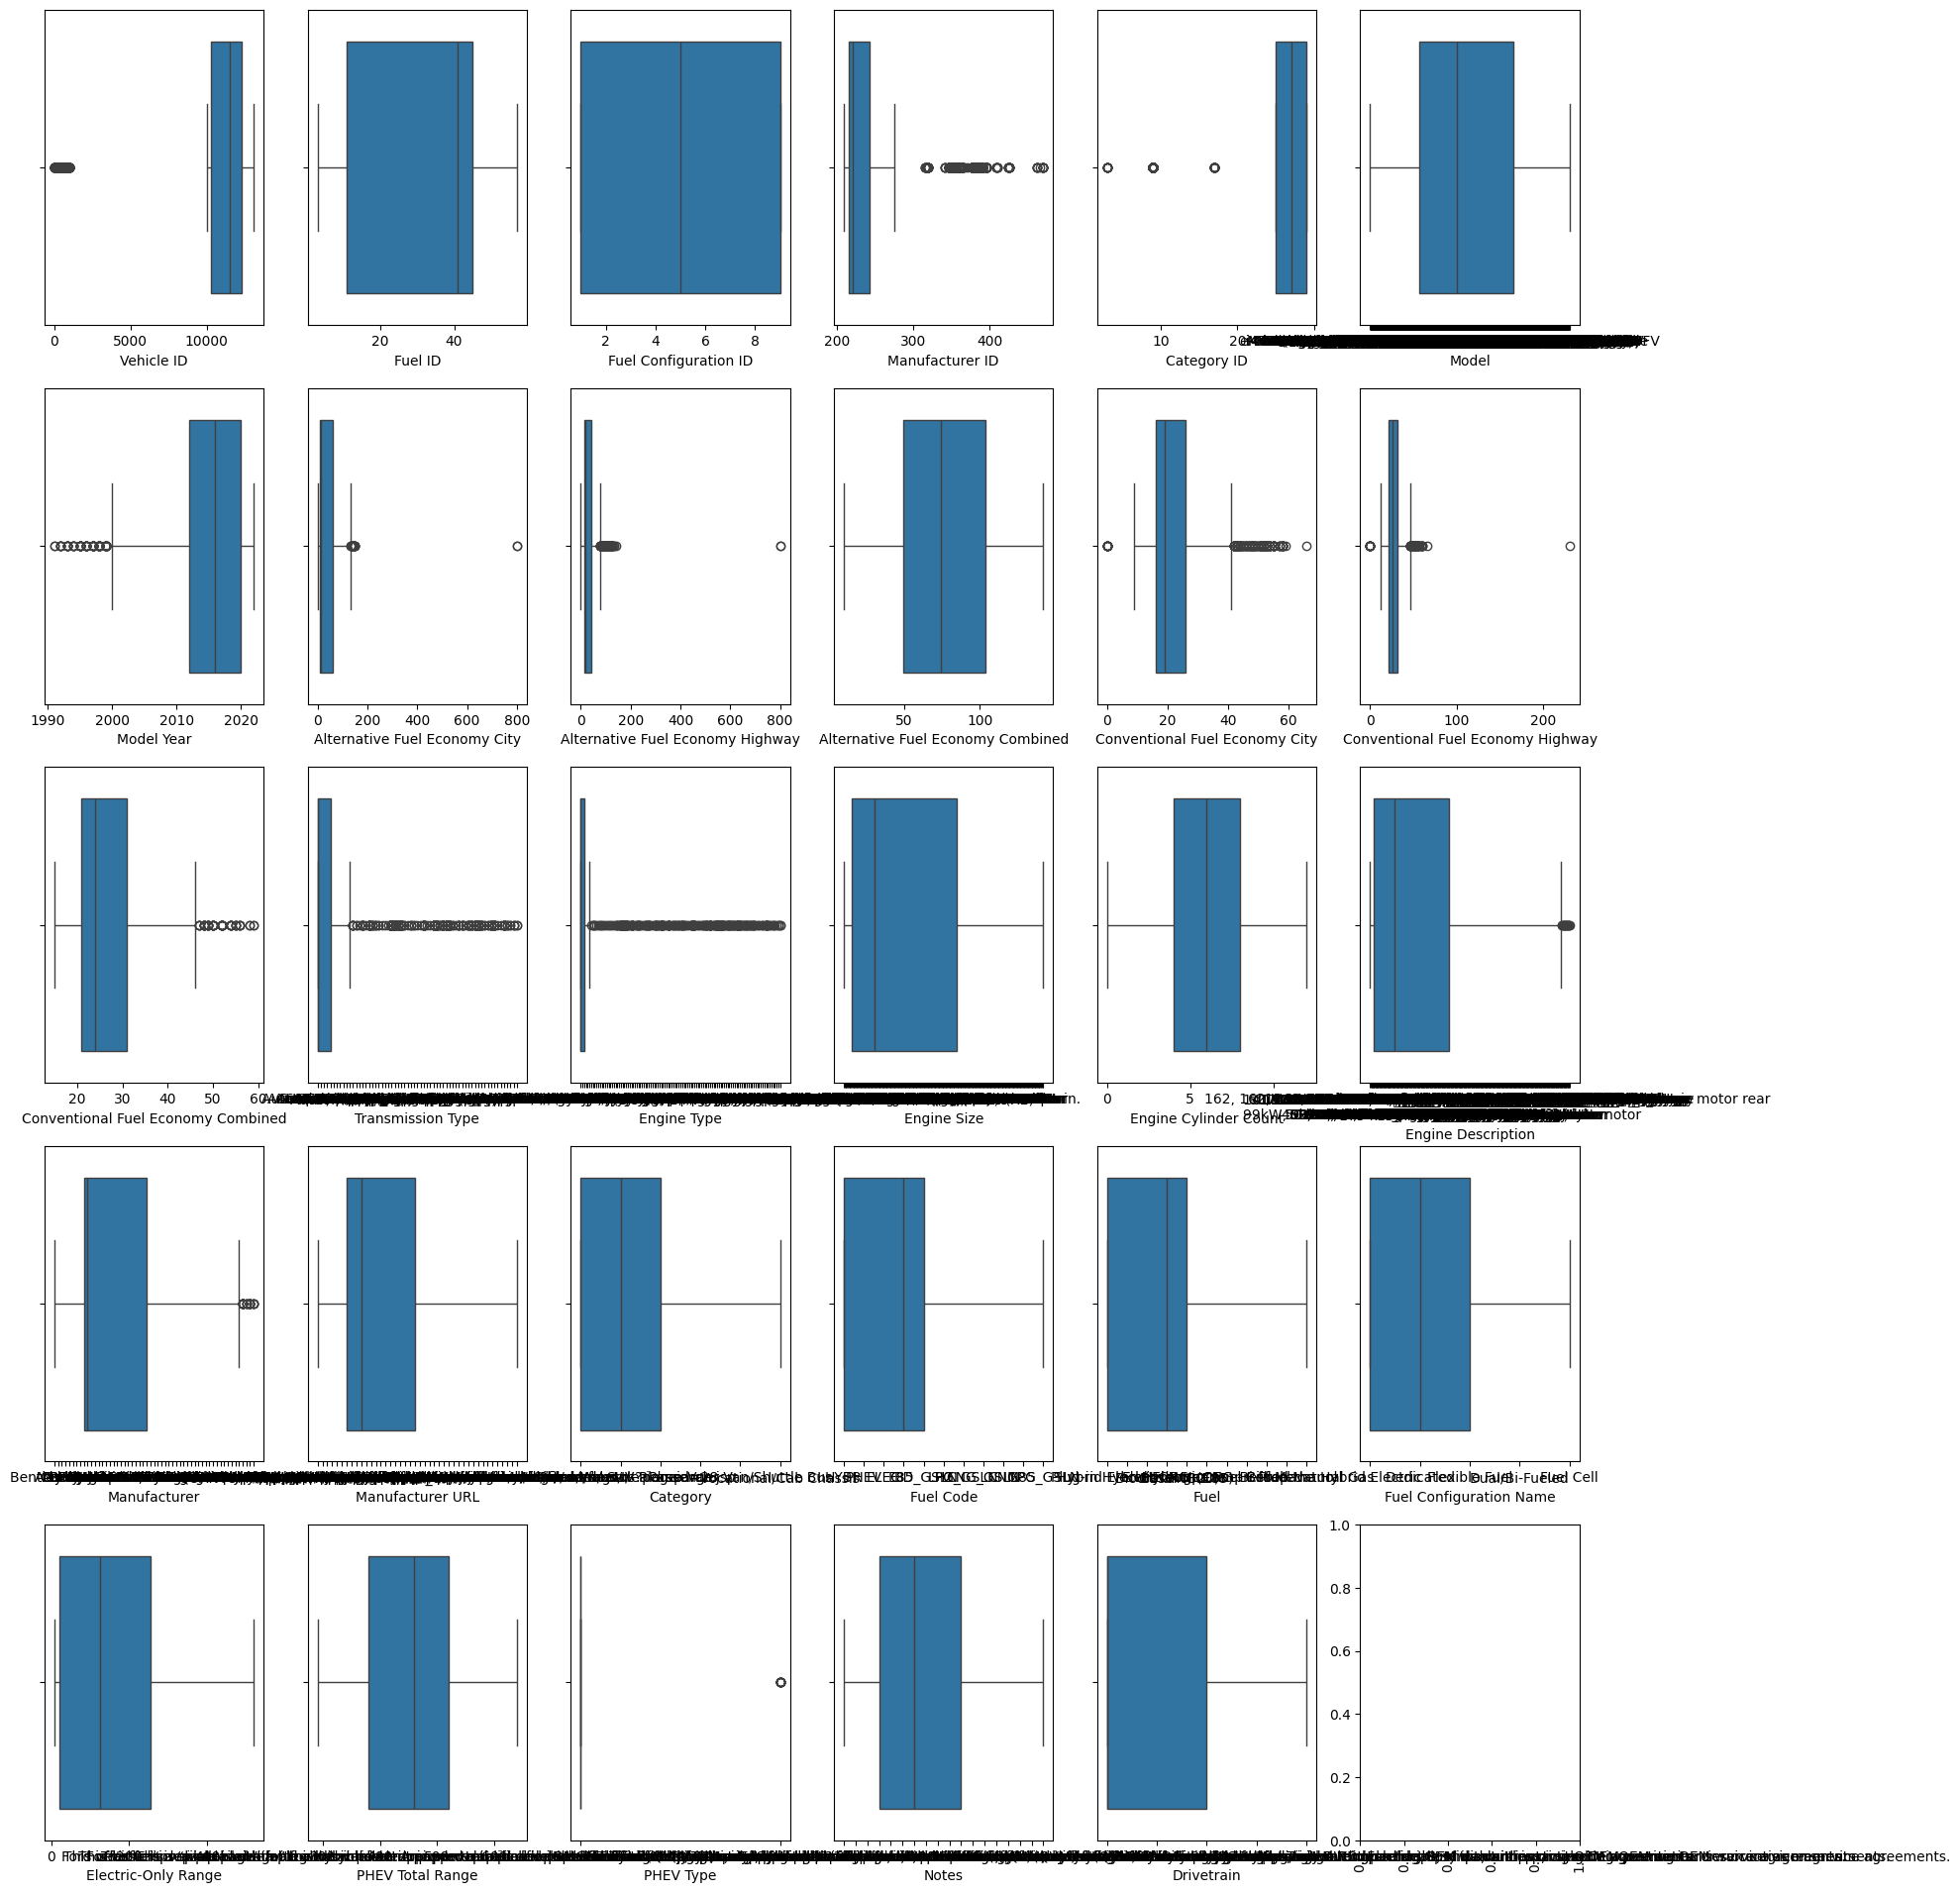

In [15]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(5, 6, figsize=(20, 24))
# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()
# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:29]):  # Asegúrate de tener 29 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)
# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()


Existen gran cantidad de outliers Comenzando con al año del modelo de autos en el set, puesto que modelos de automoviles menores al año 2000 son considerados outliers y sin embargo en el dataset existen esos rangos de años, aunque no debe tomarse como si no existieran.

- Otro outliers esta en la columna AlternativeFuelEcnonomyCity es decir, eficiencia de combustible en la ciudad, donde un valor mayor a 200 es considerado fuera de rango
- En AlternativeFuelEconomHighway es decir eficiencia de combustible en carretera los valores mayores a 200 son considerados outliers
- Dentro de la columna de ConventionalFuelEcnonomyCity ragos de entre 10 y 45 aproximadamente son considerados datos correctos dentro del dataset
- Para ConventionalFuelEcnonomyHighway el rango de datos correctos esta entre 20 y 60 aproximadamente se consideran datos buenos, todos los demas son outliers
- Para ConventionalFuelEcnonomyCombined valores mayores a 47 son outliers

Cabe mencionar que los graficos que tienen los datos encimados son de tipo texto y demasiado grandes

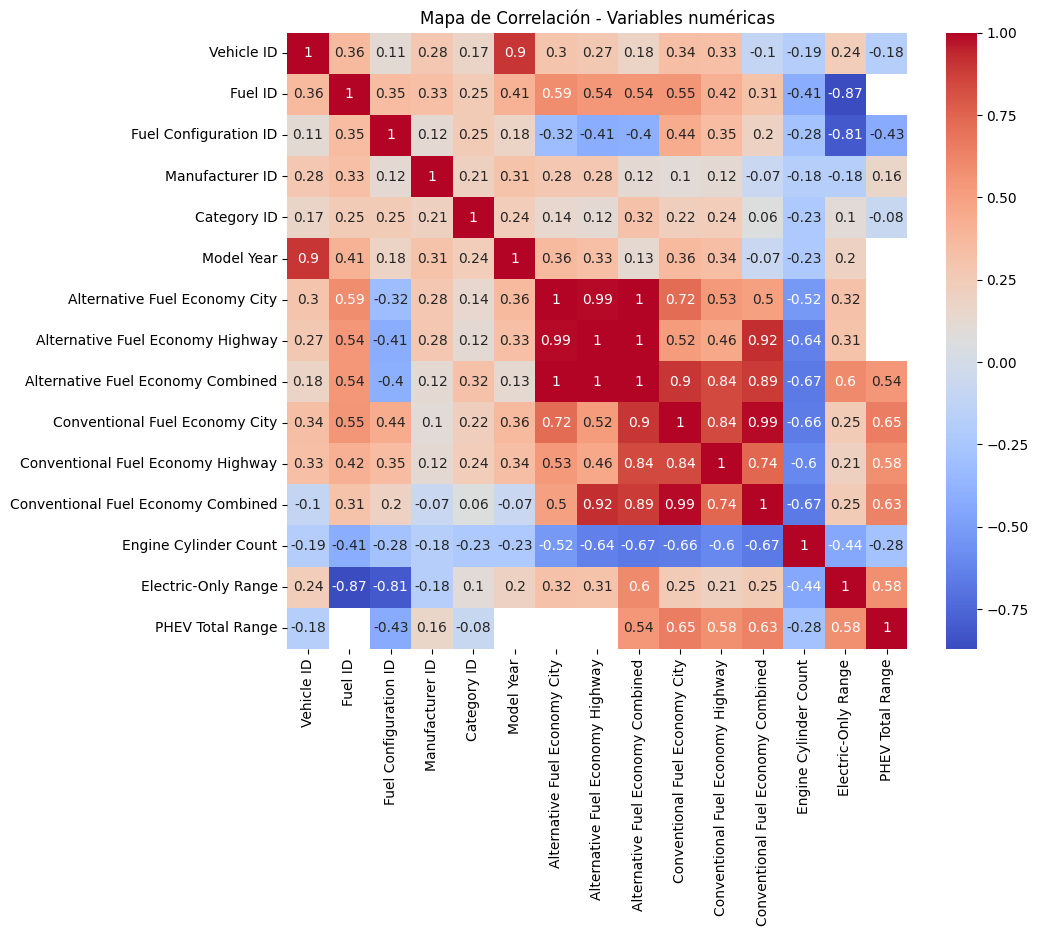

In [16]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Para el analisis del mapa de correlaciones se observa que:

- Entre la columna Rango solo electrico y el tipo de conector se muestra una correlacion positiva, es decir, que el conector influye en el rendimiento de vehiculos electricos

---
Funciones para graficar
---
---

In [28]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia (Número de vehículos)')
        plt.title(f'Top 30 {colum}')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum}')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

---
Analisis EDA en conjunto
---
---

In [20]:
df.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Cylinder Count',
       'Engine Description', 'Manufacturer', 'Manufacturer URL', 'Category',
       'Fuel Code', 'Fuel', 'Fuel Configuration Name', 'Electric-Only Range',
       'PHEV Total Range', 'PHEV Type', 'Notes', 'Drivetrain'],
      dtype='object')

In [26]:
columnas = [
'Model',
'Model Year',
'Alternative Fuel Economy City',
'Alternative Fuel Economy Highway',
'Alternative Fuel Economy Combined',
'Conventional Fuel Economy City',
'Conventional Fuel Economy Highway',
'Conventional Fuel Economy Combined',
'Transmission Type',
'Engine Type',
'Engine Size',
'Engine Cylinder Count',
'Engine Description',
'Manufacturer',
'Manufacturer URL',
'Category',
'Fuel Code',
'Fuel',
'Fuel Configuration Name',
'Electric-Only Range',
'PHEV Total Range',
'PHEV Type',
'Notes',
'Drivetrain'
]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


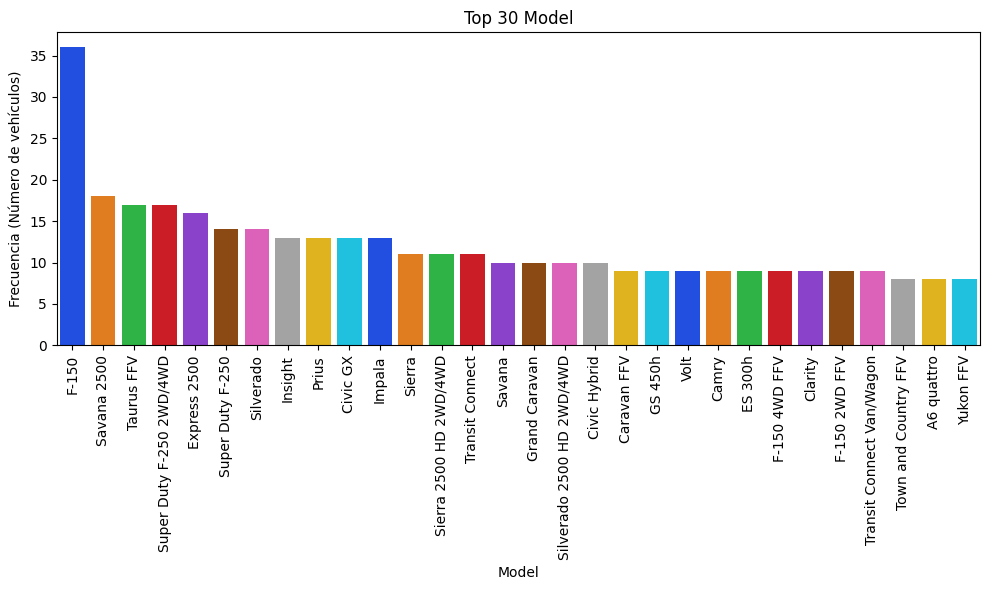

Model
F-150                        36
Savana 2500                  18
Taurus FFV                   17
Super Duty F-250 2WD/4WD     17
Express 2500                 16
Super Duty F-250             14
Silverado                    14
Insight                      13
Prius                        13
Civic GX                     13
Impala                       13
Sierra                       11
Sierra 2500 HD 2WD/4WD       11
Transit Connect              11
Savana                       10
Grand Caravan                10
Silverado 2500 HD 2WD/4WD    10
Civic Hybrid                 10
Caravan FFV                   9
GS 450h                       9
Volt                          9
Camry                         9
ES 300h                       9
F-150 4WD FFV                 9
Clarity                       9
F-150 2WD FFV                 9
Transit Connect Van/Wagon     9
Town and Country FFV          8
A6 quattro                    8
Yukon FFV                     8
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


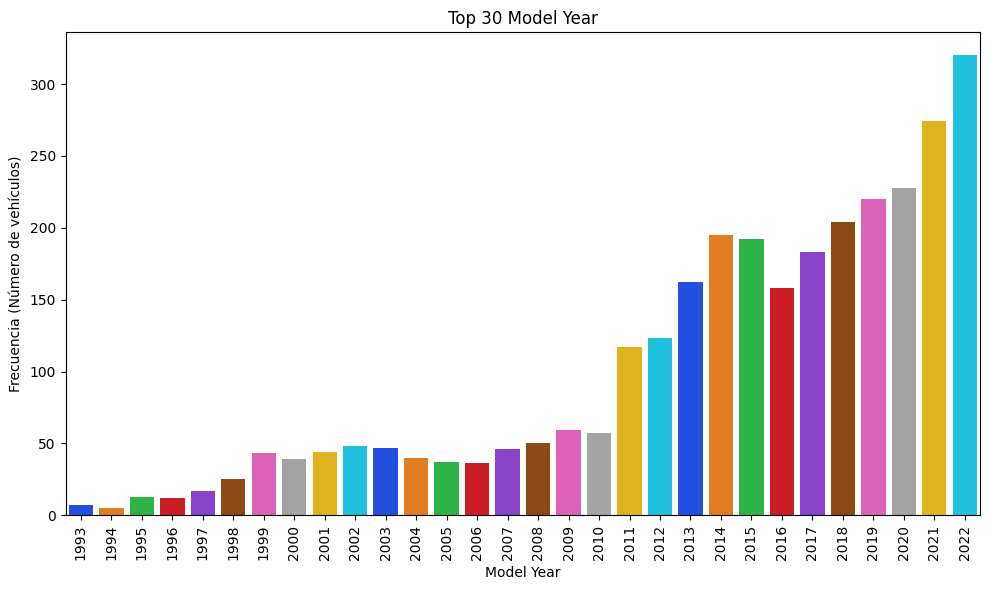

Model Year
2022    320
2021    274
2020    228
2019    220
2018    204
2014    195
2015    192
2017    183
2013    162
2016    158
2012    123
2011    117
2009     59
2010     57
2008     50
2002     48
2003     47
2007     46
2001     44
1999     43
2004     40
2000     39
2005     37
2006     36
1998     25
1997     17
1995     13
1996     12
1993      7
1994      5
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


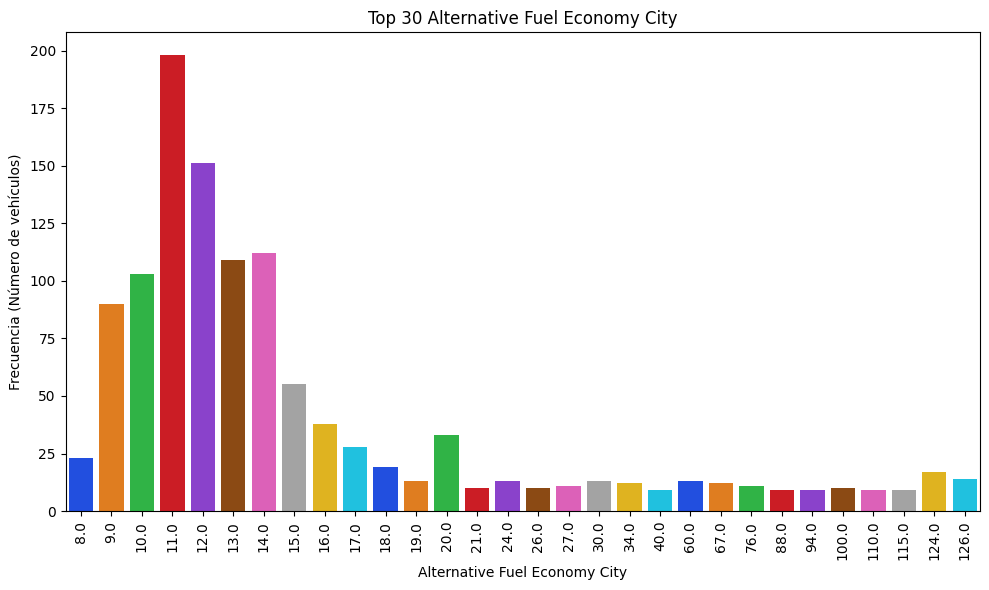

Alternative Fuel Economy City
11.0     198
12.0     151
14.0     112
13.0     109
10.0     103
9.0       90
15.0      55
16.0      38
20.0      33
17.0      28
8.0       23
18.0      19
124.0     17
126.0     14
19.0      13
24.0      13
60.0      13
30.0      13
67.0      12
34.0      12
27.0      11
76.0      11
21.0      10
100.0     10
26.0      10
40.0       9
115.0      9
94.0       9
110.0      9
88.0       9
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


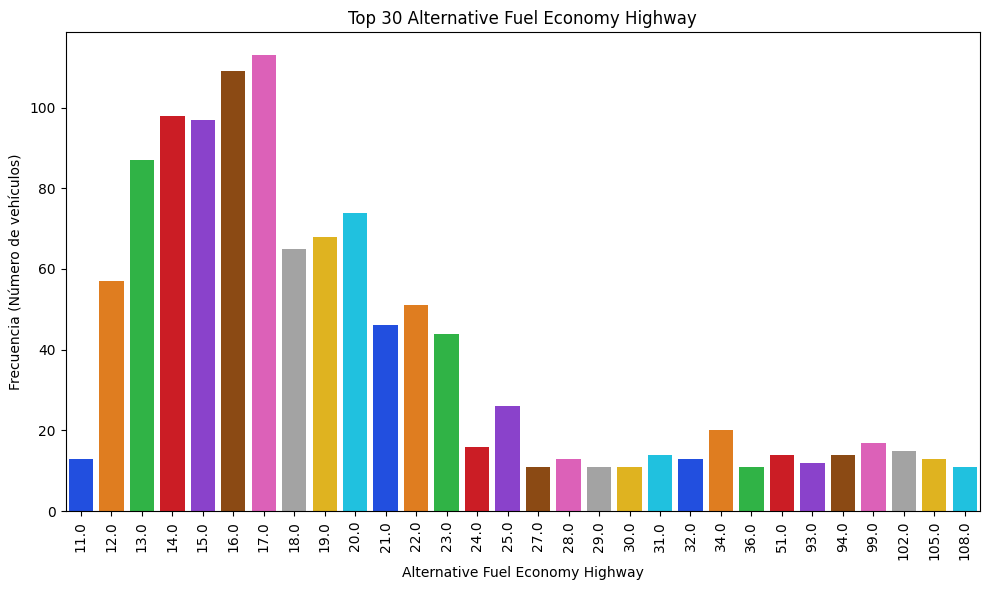

Alternative Fuel Economy Highway
17.0     113
16.0     109
14.0      98
15.0      97
13.0      87
20.0      74
19.0      68
18.0      65
12.0      57
22.0      51
21.0      46
23.0      44
25.0      26
34.0      20
99.0      17
24.0      16
102.0     15
94.0      14
31.0      14
51.0      14
32.0      13
28.0      13
11.0      13
105.0     13
93.0      12
29.0      11
108.0     11
30.0      11
27.0      11
36.0      11
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


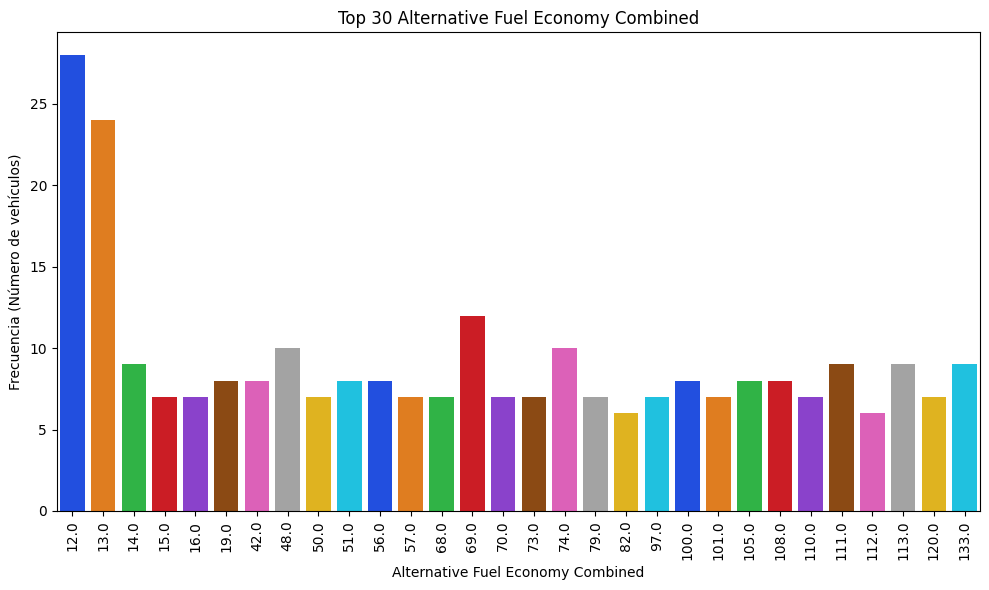

Alternative Fuel Economy Combined
12.0     28
13.0     24
69.0     12
74.0     10
48.0     10
133.0     9
113.0     9
111.0     9
14.0      9
108.0     8
51.0      8
105.0     8
19.0      8
56.0      8
100.0     8
42.0      8
110.0     7
120.0     7
16.0      7
97.0      7
15.0      7
68.0      7
57.0      7
70.0      7
50.0      7
79.0      7
73.0      7
101.0     7
112.0     6
82.0      6
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


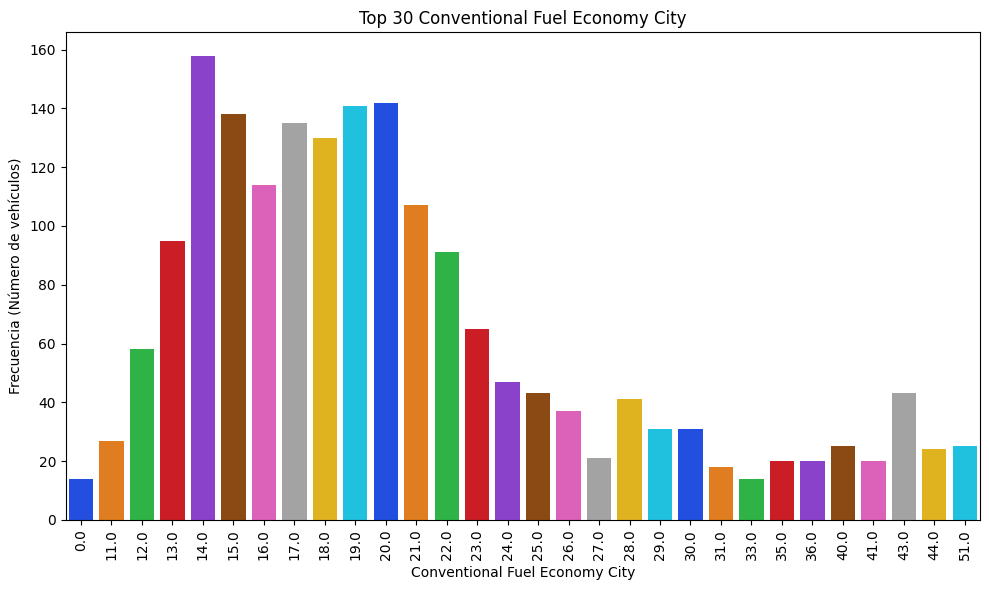

Conventional Fuel Economy City
14.0    158
20.0    142
19.0    141
15.0    138
17.0    135
18.0    130
16.0    114
21.0    107
13.0     95
22.0     91
23.0     65
12.0     58
24.0     47
25.0     43
43.0     43
28.0     41
26.0     37
29.0     31
30.0     31
11.0     27
40.0     25
51.0     25
44.0     24
27.0     21
35.0     20
36.0     20
41.0     20
31.0     18
33.0     14
0.0      14
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


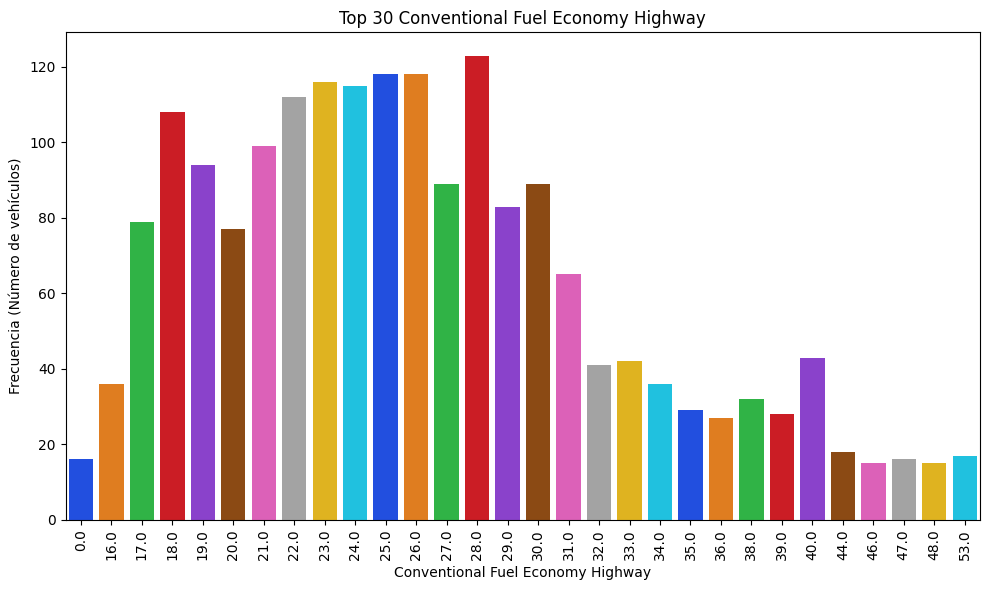

Conventional Fuel Economy Highway
28.0    123
25.0    118
26.0    118
23.0    116
24.0    115
22.0    112
18.0    108
21.0     99
19.0     94
27.0     89
30.0     89
29.0     83
17.0     79
20.0     77
31.0     65
40.0     43
33.0     42
32.0     41
34.0     36
16.0     36
38.0     32
35.0     29
39.0     28
36.0     27
44.0     18
53.0     17
47.0     16
0.0      16
46.0     15
48.0     15
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


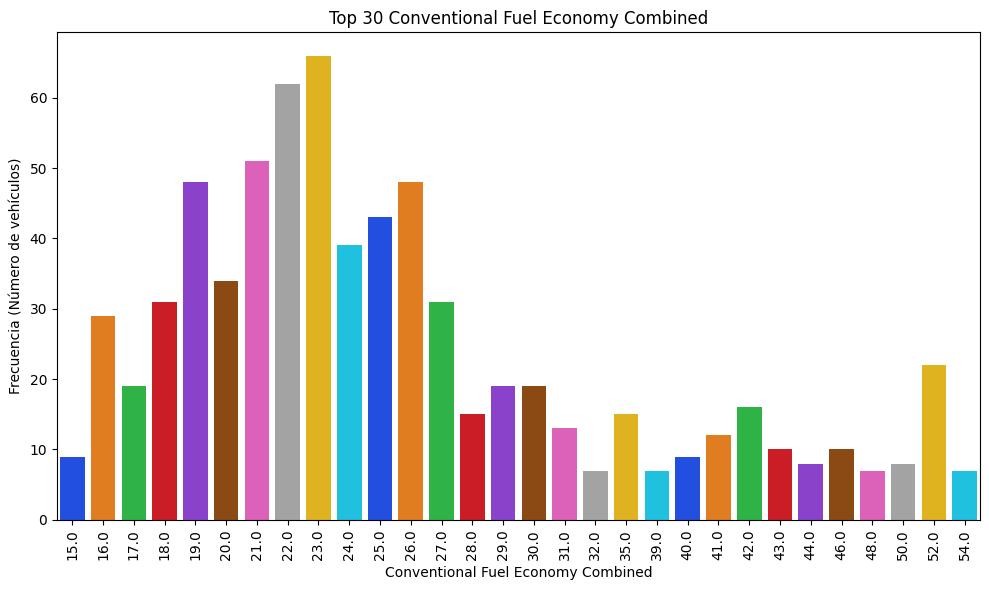

Conventional Fuel Economy Combined
23.0    66
22.0    62
21.0    51
19.0    48
26.0    48
25.0    43
24.0    39
20.0    34
18.0    31
27.0    31
16.0    29
52.0    22
17.0    19
29.0    19
30.0    19
42.0    16
28.0    15
35.0    15
31.0    13
41.0    12
43.0    10
46.0    10
40.0     9
15.0     9
44.0     8
50.0     8
39.0     7
48.0     7
54.0     7
32.0     7
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


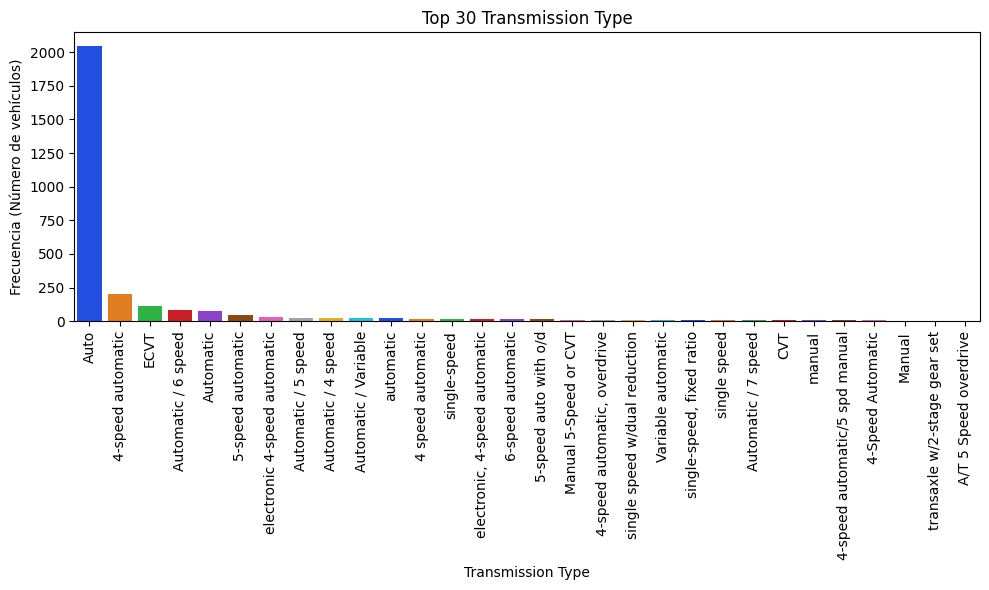

Transmission Type
Auto                              2045
4-speed automatic                  199
ECVT                               111
Automatic / 6 speed                 86
Automatic                           77
5-speed automatic                   45
electronic 4-speed automatic        35
Automatic / 5 speed                 24
Automatic / 4 speed                 22
Automatic / Variable                22
automatic                           22
4 speed automatic                   20
single-speed                        16
electronic, 4-speed automatic       14
6-speed automatic                   14
5-speed auto with o/d               13
Manual 5-Speed or CVT               10
4-speed automatic, overdrive         9
single speed w/dual reduction        9
Variable automatic                   8
single-speed, fixed ratio            8
single speed                         7
Automatic / 7 speed                  7
CVT                                  6
manual                               6
4-speed

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


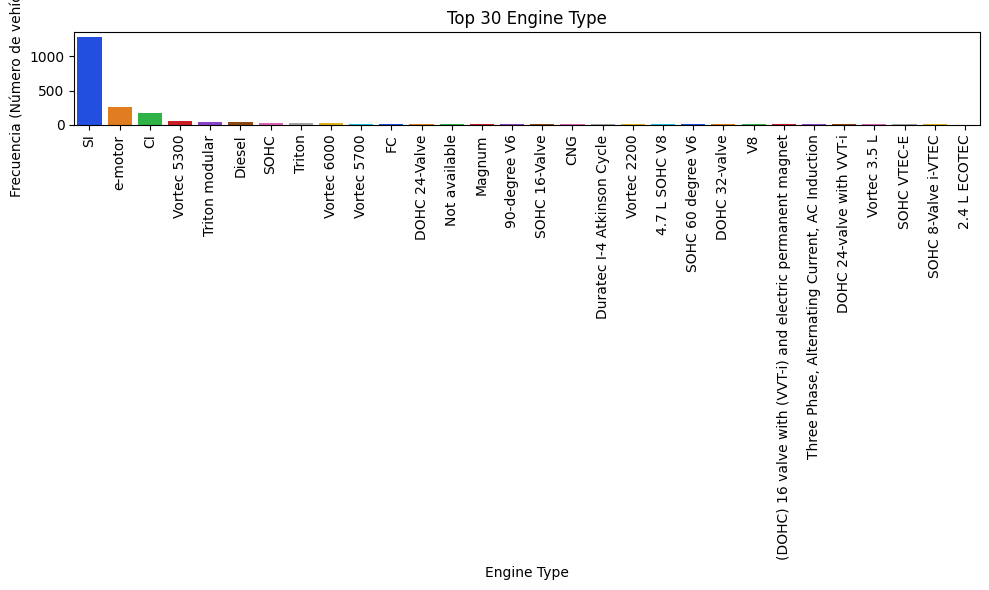

Engine Type
SI                                                            1287
e-motor                                                        261
CI                                                             176
Vortec 5300                                                     61
Triton modular                                                  39
Diesel                                                          35
SOHC                                                            25
Triton                                                          21
Vortec 6000                                                     20
Vortec 5700                                                     14
FC                                                              13
DOHC 24-Valve                                                   13
Not available                                                   10
Magnum                                                          10
90-degree V6                                      

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


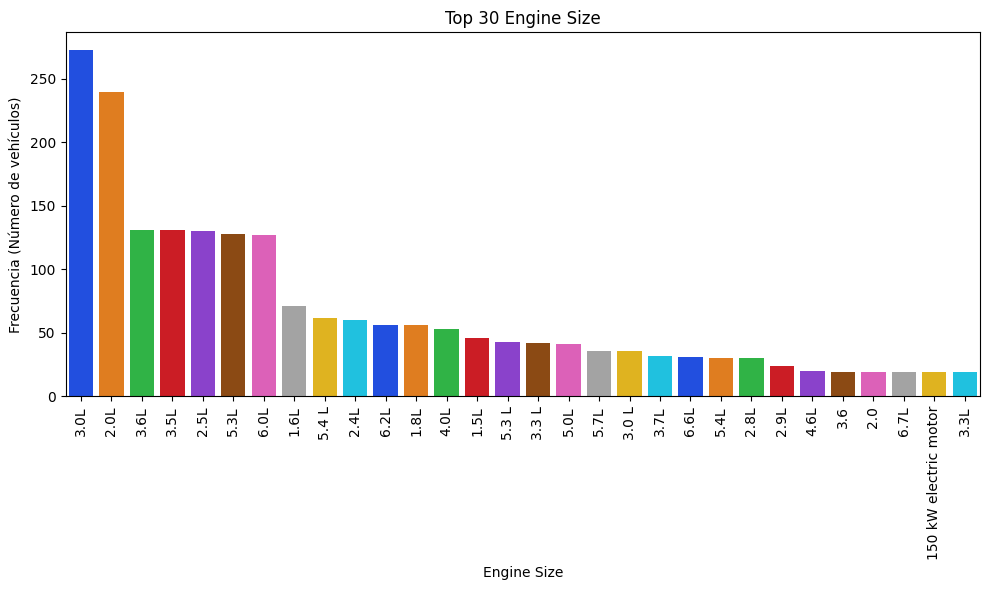

Engine Size
3.0L                     273
2.0L                     240
3.6L                     131
3.5L                     131
2.5L                     130
5.3L                     128
6.0L                     127
1.6L                      71
5.4 L                     62
2.4L                      60
6.2L                      56
1.8L                      56
4.0L                      53
1.5L                      46
5.3 L                     43
3.3 L                     42
5.0L                      41
5.7L                      36
3.0 L                     36
3.7L                      32
6.6L                      31
5.4L                      30
2.8L                      30
2.9L                      24
4.6L                      20
3.6                       19
2.0                       19
6.7L                      19
150 kW electric motor     19
3.3L                      19
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


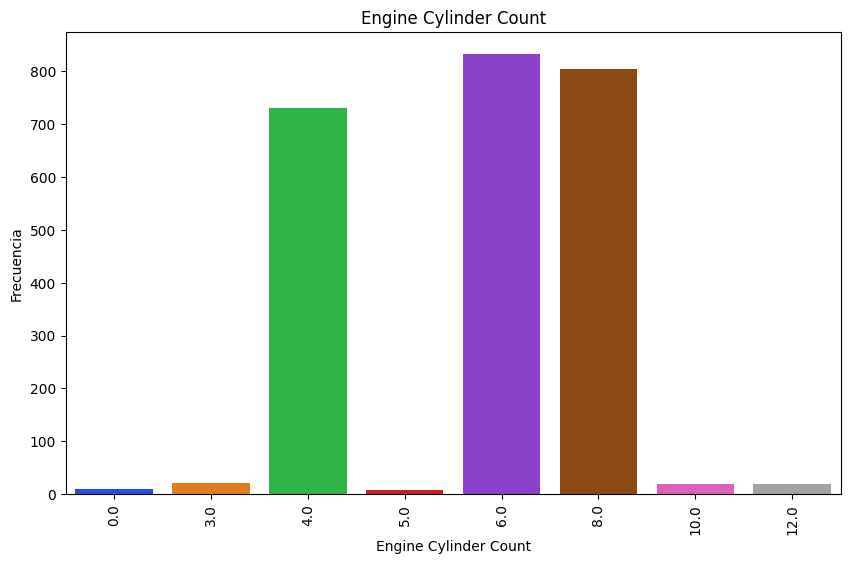

Engine Cylinder Count
6.0     833
8.0     805
4.0     731
3.0      20
10.0     19
12.0     18
0.0       9
5.0       8
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
) missing from current font.al\Temp\ipykernel_21560\977413982.py:11: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.ming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


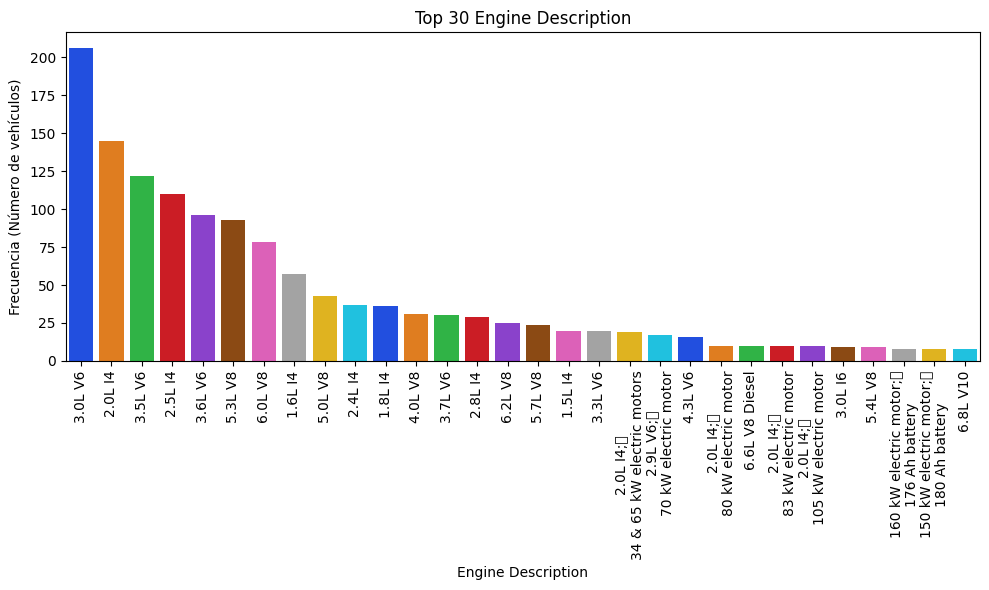

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


Engine Description
3.0L V6                                     206
2.0L I4                                     145
3.5L V6                                     122
2.5L I4                                     110
3.6L V6                                      96
5.3L V8                                      93
6.0L V8                                      78
1.6L I4                                      57
5.0L V8                                      43
2.4L I4                                      37
1.8L I4                                      36
4.0L V8                                      31
3.7L V6                                      30
2.8L I4                                      29
6.2L V8                                      25
5.7L V8                                      24
1.5L I4                                      20
3.3L V6                                      20
2.0L I4;\r\n34 & 65 kW electric motors       19
2.9L V6;\r\n70 kW electric motor             17
4.3L V6              

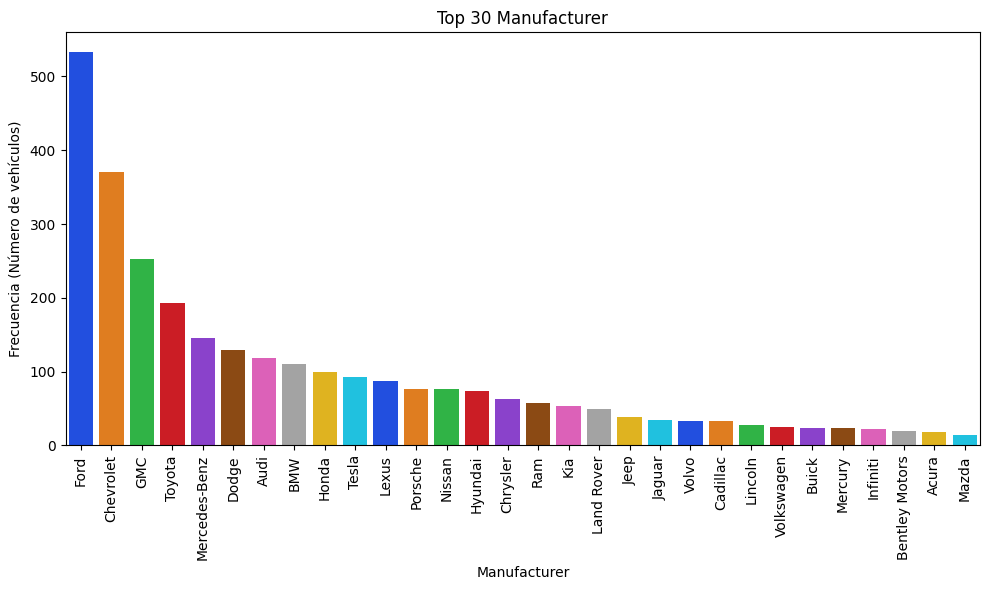

Manufacturer
Ford              533
Chevrolet         371
GMC               252
Toyota            193
Mercedes-Benz     146
Dodge             130
Audi              118
BMW               110
Honda              99
Tesla              93
Lexus              87
Porsche            76
Nissan             76
Hyundai            74
Chrysler           63
Ram                57
Kia                53
Land Rover         49
Jeep               38
Jaguar             34
Volvo              33
Cadillac           33
Lincoln            28
Volkswagen         25
Buick              23
Mercury            23
Infiniti           22
Bentley Motors     20
Acura              18
Mazda              14
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


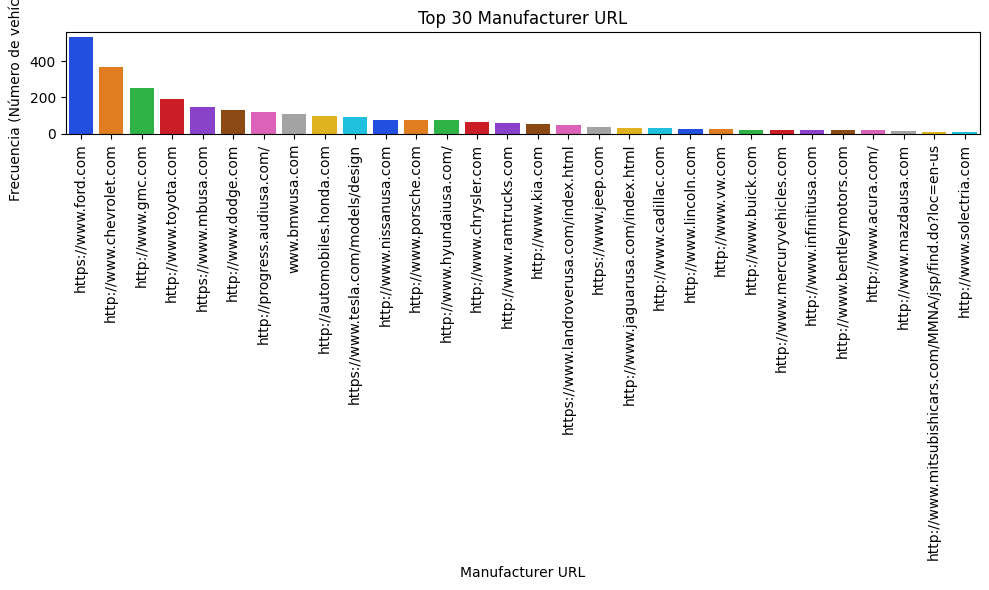

Manufacturer URL
https://www.ford.com                                        533
http://www.chevrolet.com                                    371
http://www.gmc.com                                          252
http://www.toyota.com                                       193
https://www.mbusa.com                                       146
http://www.dodge.com                                        130
http://progress.audiusa.com/                                118
www.bmwusa.com                                              110
http://automobiles.honda.com                                 99
https://www.tesla.com/models/design                          93
http://www.nissanusa.com                                     76
http://www.porsche.com                                       76
http://www.hyundaiusa.com/                                   74
http://www.chrysler.com                                      63
http://www.ramtrucks.com                                     57
http://www.kia.com     

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


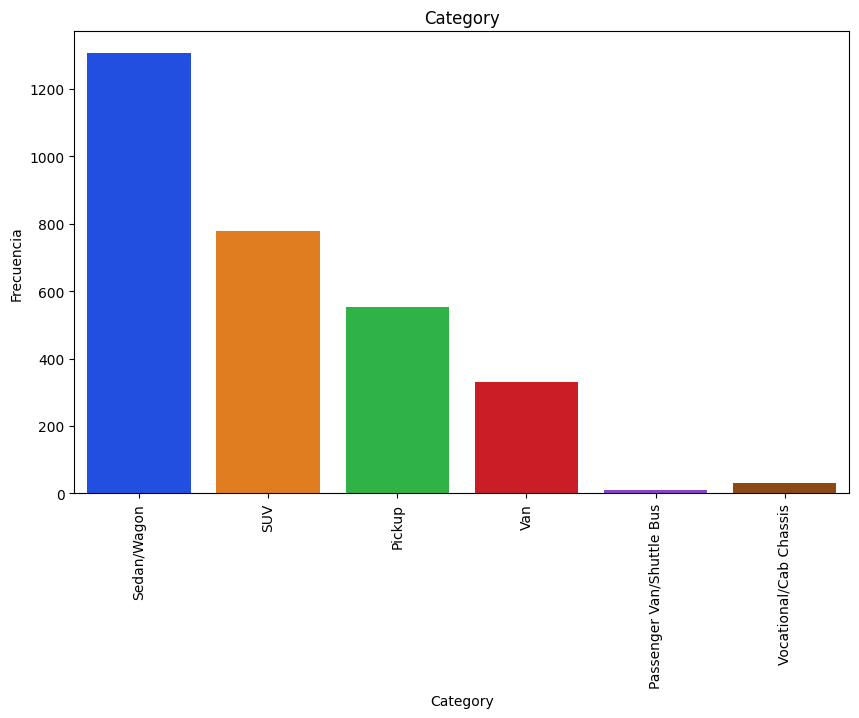

Category
Sedan/Wagon                  1305
SUV                           778
Pickup                        553
Van                           330
Vocational/Cab Chassis         32
Passenger Van/Shuttle Bus      10
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


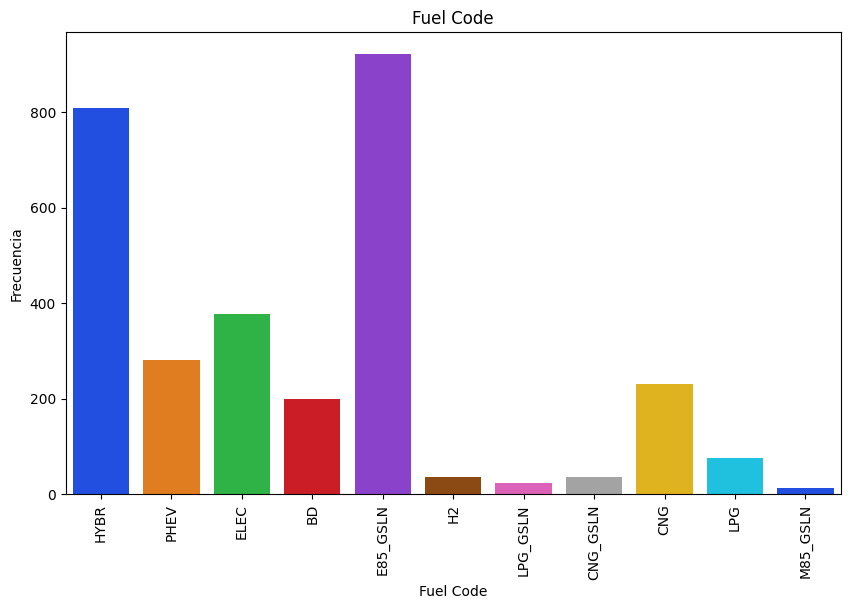

Fuel Code
E85_GSLN    922
HYBR        810
ELEC        378
PHEV        282
CNG         231
BD          200
LPG          75
H2           36
CNG_GSLN     36
LPG_GSLN     24
M85_GSLN     14
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


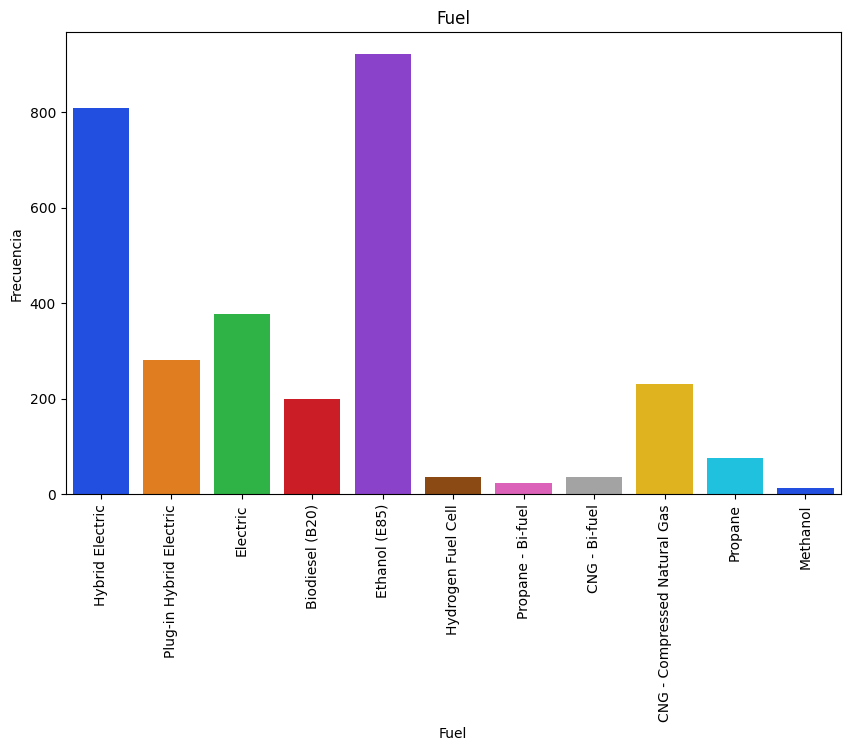

Fuel
Ethanol (E85)                   922
Hybrid Electric                 810
Electric                        378
Plug-in Hybrid Electric         282
CNG - Compressed Natural Gas    231
Biodiesel (B20)                 200
Propane                          75
Hydrogen Fuel Cell               36
CNG - Bi-fuel                    36
Propane - Bi-fuel                24
Methanol                         14
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


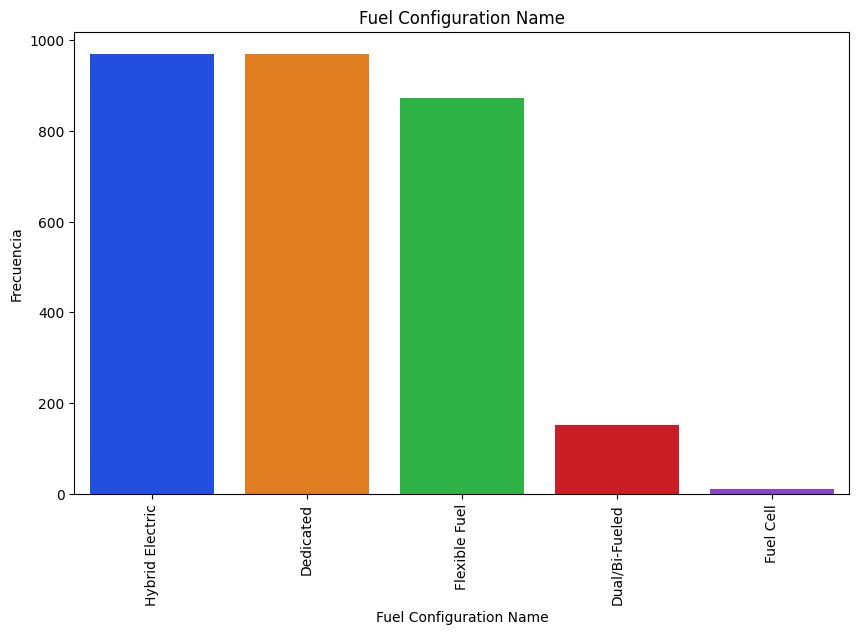

Fuel Configuration Name
Hybrid Electric    970
Dedicated          969
Flexible Fuel      872
Dual/Bi-Fueled     151
Fuel Cell           11
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


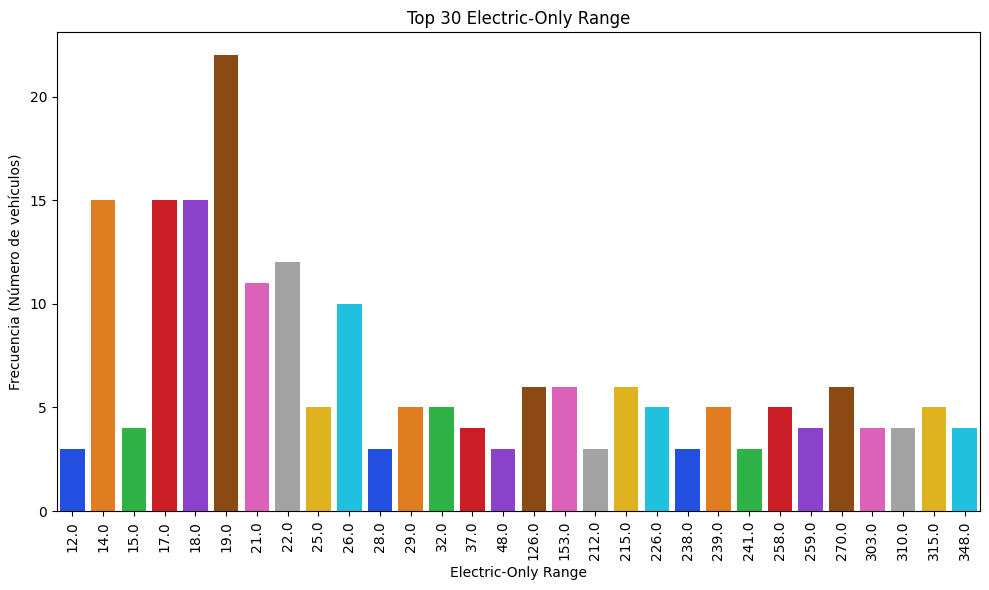

Electric-Only Range
19.0     22
14.0     15
17.0     15
18.0     15
22.0     12
21.0     11
26.0     10
215.0     6
270.0     6
153.0     6
126.0     6
25.0      5
239.0     5
226.0     5
258.0     5
29.0      5
315.0     5
32.0      5
310.0     4
348.0     4
259.0     4
303.0     4
37.0      4
15.0      4
48.0      3
12.0      3
238.0     3
212.0     3
28.0      3
241.0     3
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


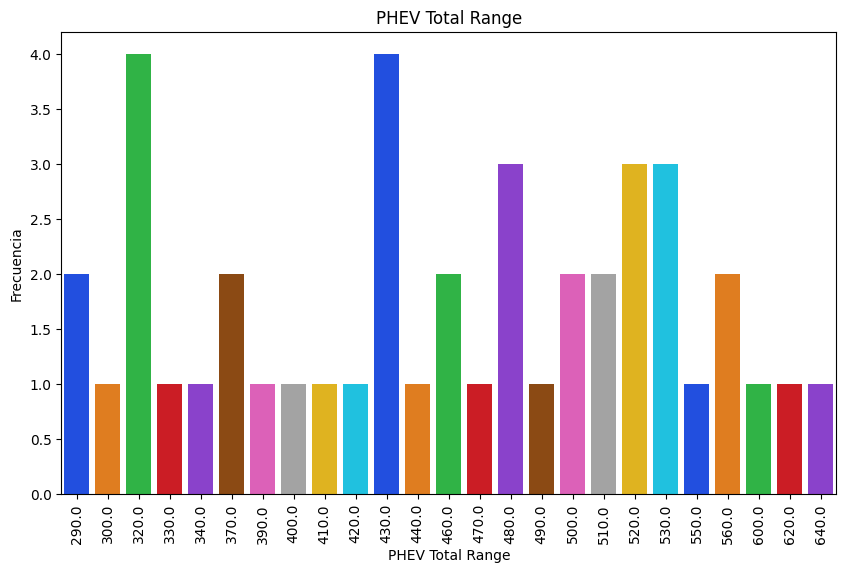

PHEV Total Range
430.0    4
320.0    4
480.0    3
530.0    3
520.0    3
500.0    2
290.0    2
510.0    2
370.0    2
560.0    2
460.0    2
490.0    1
600.0    1
640.0    1
300.0    1
550.0    1
410.0    1
390.0    1
420.0    1
440.0    1
620.0    1
330.0    1
400.0    1
340.0    1
470.0    1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


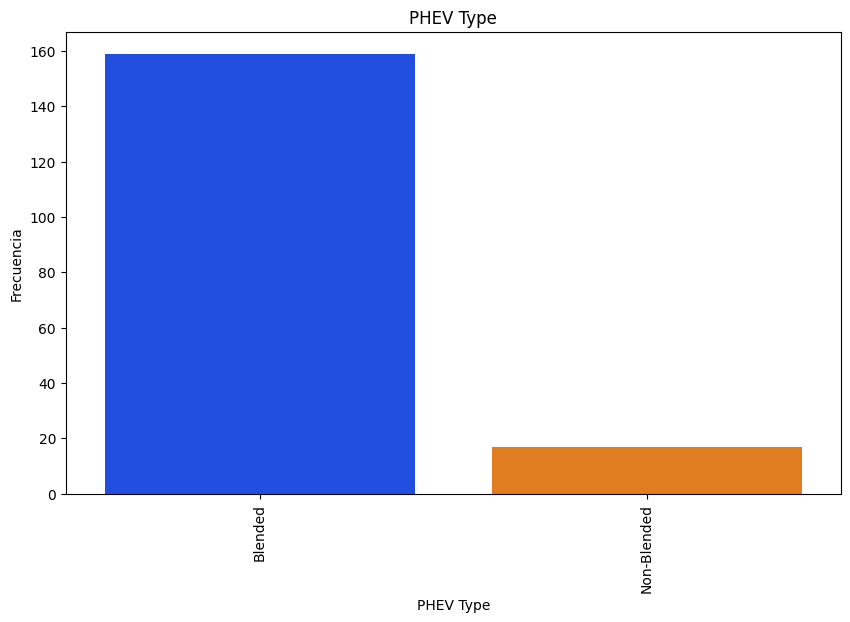

PHEV Type
Blended        159
Non-Blended     17
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


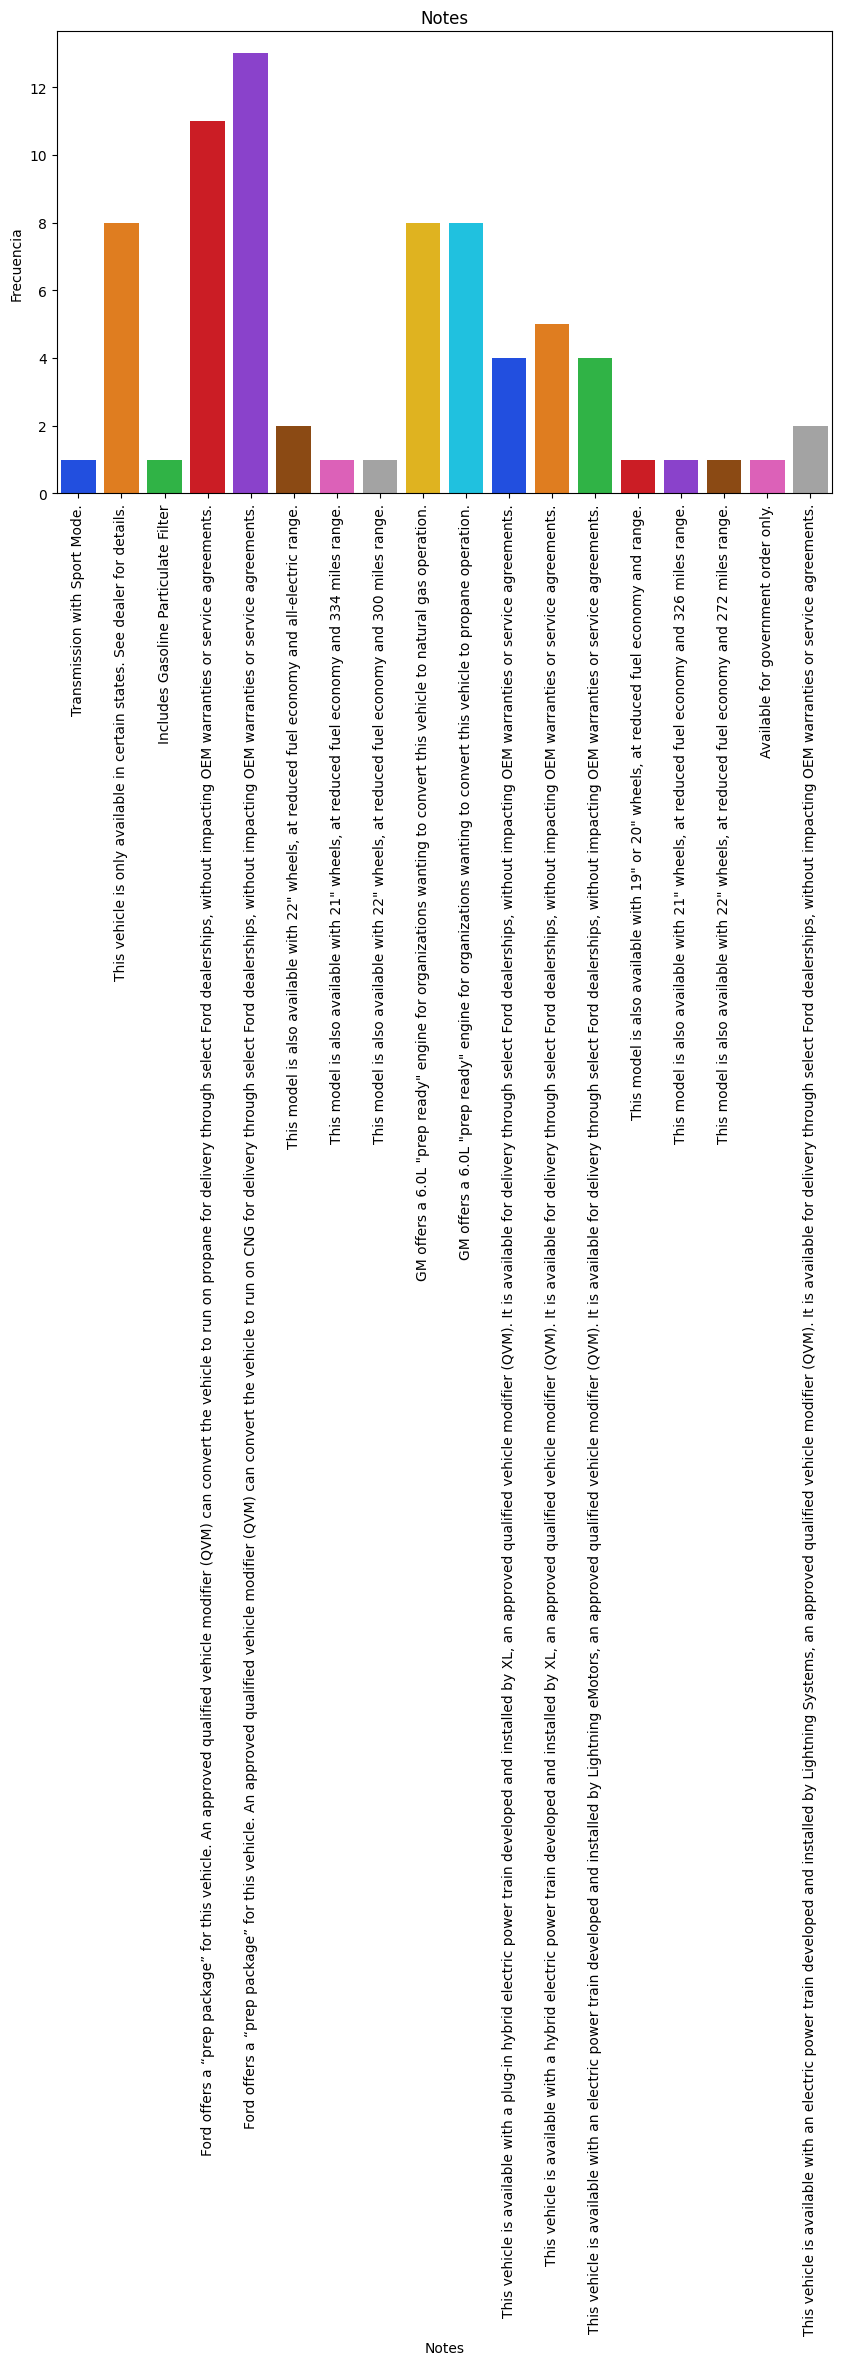

Notes
Ford offers a “prep package” for this vehicle. An approved qualified vehicle modifier (QVM) can convert the vehicle to run on CNG for delivery through select Ford dealerships, without impacting OEM warranties or service agreements.                                     13
Ford offers a “prep package” for this vehicle. An approved qualified vehicle modifier (QVM) can convert the vehicle to run on propane for delivery through select Ford dealerships, without impacting OEM warranties or service agreements.                                 11
GM offers a 6.0L "prep ready" engine for organizations wanting to convert this vehicle to propane operation.                                                                                                                                                                 8
GM offers a 6.0L "prep ready" engine for organizations wanting to convert this vehicle to natural gas operation.                                                                     

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


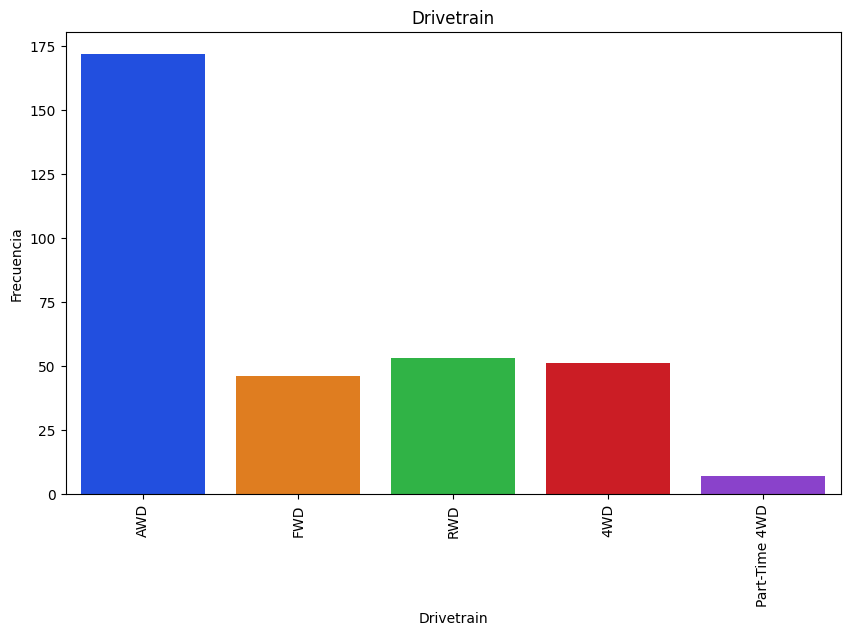

Drivetrain
AWD              172
RWD               53
4WD               51
FWD               46
Part-Time 4WD      7
Name: count, dtype: int64


In [29]:
for colum in columnas:
    print(graficar_conteo(colum))